## NLP with TensorFlow

From _Deep Learning with Python_ by François Chollet

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

In [2]:
NUM_WORDS = 10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=NUM_WORDS, skip_top=100)

In [4]:
print(x_train[0])
print(y_train[0])

[2, 2, 2, 2, 2, 530, 973, 1622, 1385, 2, 458, 4468, 2, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 2, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 2, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 2, 2, 2, 2, 2, 530, 2, 2, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 2, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 5244, 2, 480, 2, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 2, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 2, 2, 2, 2, 407, 2, 2, 2, 2, 2, 107, 117, 5952, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 2, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 2, 2, 381, 2, 297, 2, 2, 2071, 2, 2, 141, 2, 194, 7486, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 5535, 2, 2, 2, 2, 224, 2, 2, 104, 2, 226, 2, 2, 2, 1334, 2, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 5345, 2, 178, 2]
1


In [5]:
reverse_index = {v : k for (k, v) in imdb.get_word_index().items()}
# skip "padding", "start of sequence", and "unknown"
decoded_review = ' '.join([reverse_index.get(i - 3, '?') for i in x_train[0]])
decoded_review

"? ? ? ? ? brilliant casting location scenery ? direction everyone's ? suited ? part ? played ? ? could ? imagine being ? robert ? ? ? amazing actor ? now ? same being director ? father came ? ? same scottish island ? myself ? ? loved ? fact ? ? ? real connection ? ? ? ? witty remarks throughout ? ? ? ? ? ? ? brilliant ? ? ? ? bought ? ? ? soon ? ? ? released ? ? ? ? recommend ? ? everyone ? watch ? ? fly fishing ? amazing ? cried ? ? end ? ? ? sad ? ? know ? ? say ? ? cry ? ? ? ? must ? ? ? ? ? definitely ? ? ? ? ? two little boy's ? played ? ? ? norman ? paul ? ? ? brilliant children ? often left ? ? ? ? list ? think ? ? stars ? play ? ? grown ? ? such ? big profile ? ? whole ? ? these children ? amazing ? should ? praised ? ? ? ? done ? ? think ? whole ? ? ? lovely ? ? ? true ? ? someone's life after ? ? ? shared ? us ?"

In [6]:
len(x_train[0])

218

In [7]:
def vectorize_seqs(seqs, dimension=NUM_WORDS):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros(shape=(len(seqs), dimension))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.0
    return results

x_train = vectorize_seqs(x_train)
x_test = vectorize_seqs(x_test)

In [8]:
len(x_train[0])

10000

In [9]:
x_train[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              #loss=losses.mean_squared_error,
              metrics=[metrics.binary_accuracy])

In [13]:
%%time
history = model.fit(x_train,
                    y_train,
                    validation_split=0.15,
                    epochs=10, 
                    batch_size=512)

Train on 21250 samples, validate on 3750 samples
Epoch 1/10
21250/21250 [==============================] - 1s 60us/sample - loss: 0.4535 - binary_accuracy: 0.8287 - val_loss: 0.3472 - val_binary_accuracy: 0.8725
Epoch 2/10
21250/21250 [==============================] - 1s 43us/sample - loss: 0.2530 - binary_accuracy: 0.9159 - val_loss: 0.2916 - val_binary_accuracy: 0.8883
Epoch 3/10
21250/21250 [==============================] - 1s 44us/sample - loss: 0.1892 - binary_accuracy: 0.9355 - val_loss: 0.2917 - val_binary_accuracy: 0.8893
Epoch 4/10
21250/21250 [==============================] - 1s 47us/sample - loss: 0.1519 - binary_accuracy: 0.9488 - val_loss: 0.3257 - val_binary_accuracy: 0.8811
Epoch 5/10
21250/21250 [==============================] - 1s 43us/sample - loss: 0.1255 - binary_accuracy: 0.9577 - val_loss: 0.3415 - val_binary_accuracy: 0.8800
Epoch 6/10
21250/21250 [==============================] - 1s 42us/sample - loss: 0.1029 - binary_accuracy: 0.9667 - val_loss: 0.3844 - v

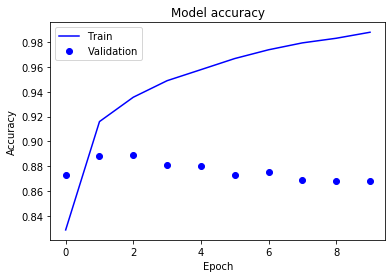

In [14]:
%matplotlib inline
plt.plot(history.history['binary_accuracy'], 'b')
plt.plot(history.history['val_binary_accuracy'], 'bo')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

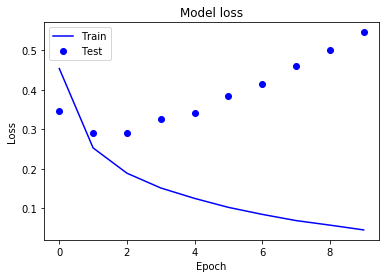

In [15]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'bo')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 48us/sample - loss: 0.4349 - binary_accuracy: 0.8420
Epoch 2/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.2488 - binary_accuracy: 0.9139
Epoch 3/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.1899 - binary_accuracy: 0.9344
Epoch 4/4
25000/25000 [==============================] - 1s 55us/sample - loss: 0.3257 - binary_accuracy: 0.8724


In [22]:
results

[0.3257300735378265, 0.8724]

In [24]:
y_hat = model.predict(x_test)

----
## Using embeddings